# nonlinear problem, pre-processing and cross-validation

## linear problem (review)

### load the data

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets.samples_generator import make_blobs, make_circles
X_train, y_train = make_blobs(
    n_samples=750,
    n_features=2,
    centers=2,
    random_state=1,
    cluster_std=0.6
)
print("X_train[0]:", X_train[0])
print("y_train[0]:", y_train[0])

X_train[0]: [-10.82774012  -3.52289137]
y_train[0]: 1


In [2]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

NameError: name 'X_test' is not defined

### Visualize the data

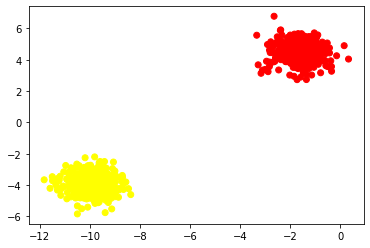

In [103]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='autumn')

### perceptron

#### split the dataset to training and testing set

In [104]:
# spliting the data into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [105]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((600, 2), (150, 2), (600,), (150,))

#### Perceptron comes from sklearn.linear_model

In [106]:
from sklearn.linear_model import Perceptron
p = Perceptron(max_iter=30, verbose=1, random_state=1)

In [107]:
p.fit(X_train, y_train)

-- Epoch 1
Norm: 11.87, NNZs: 2, Bias: -1.000000, T: 600, Avg. loss: 0.046542
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 11.87, NNZs: 2, Bias: -1.000000, T: 1200, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 11.87, NNZs: 2, Bias: -1.000000, T: 1800, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 11.87, NNZs: 2, Bias: -1.000000, T: 2400, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 11.87, NNZs: 2, Bias: -1.000000, T: 3000, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 11.87, NNZs: 2, Bias: -1.000000, T: 3600, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 11.87, NNZs: 2, Bias: -1.000000, T: 4200, Avg. loss: 0.000000
Total training time: 0.00 seconds.
Convergence after 7 epochs took 0.00 seconds


Perceptron(max_iter=30, random_state=1, verbose=1)

#### Prediction and plot

In [108]:
y_p_train = p.predict(X_train)
y_p_test = p.predict(X_test)

print(f"training accuracy: {p.score(X_train, y_train) * 100}%")
print(f"test accuracy: {p.score(X_test, y_test) * 100}%")

training accuracy: 100.0%
test accuracy: 100.0%


## What if the data is nonlinear?

### load dataset

In [116]:
X, y = make_circles(
    n_samples=200,
    noise=0.1,
    factor=0.2,
    random_state=1
)
print(X.shape, y.shape)

(200, 2) (200,)


In [120]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(160, 2) (40, 2) (160,) (40,)


### Visualize data

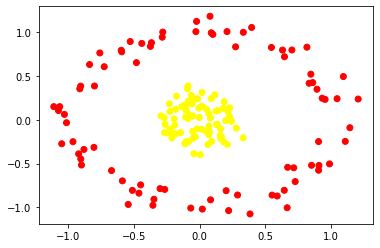

In [124]:
plt.scatter(X_train_2[:,0], X_train_2[:,1], c=y_train_2, cmap='autumn')

### If we directly use perceptron

In [222]:
p_2 = Perceptron(max_iter=50, verbose=1, random_state=1)
p_2.fit(X_train_2, y_train_2)

-- Epoch 1
Norm: 1.20, NNZs: 2, Bias: 0.000000, T: 160, Avg. loss: 0.365774
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.33, NNZs: 2, Bias: 0.000000, T: 320, Avg. loss: 0.389172
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.39, NNZs: 2, Bias: 0.000000, T: 480, Avg. loss: 0.407127
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1.46, NNZs: 2, Bias: 0.000000, T: 640, Avg. loss: 0.406384
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1.33, NNZs: 2, Bias: 1.000000, T: 800, Avg. loss: 0.345499
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.78, NNZs: 2, Bias: 0.000000, T: 960, Avg. loss: 0.418141
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.64, NNZs: 2, Bias: 1.000000, T: 1120, Avg. loss: 0.388148
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 1.33, NNZs: 2, Bias: -1.000000, T: 1280, Avg. loss: 0.407915
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.45, NNZs: 2, Bias: 1.000000, T: 1440, Avg. loss: 0.416038
Total training time: 0.00 second

Perceptron(max_iter=50, random_state=1, verbose=1)

In [224]:
print(f"training accuracy: {p_2.score(X_train_2, y_train_2) * 100}%")
print(f"test accuracy: {p_2.score(X_test_2, y_test_2) * 100}%")

training accuracy: 50.0%
test accuracy: 52.5%


## transform input x 

### $x$ $\rightarrow$ $ x^2 $

In [154]:
X_2 = X **2
X_2[1], X[1]

(array([0.57799158, 0.58017555]), array([-0.76025757,  0.76169256]))

In [155]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_2, y, test_size=0.2, random_state=1)
print(X_train_3.shape, X_test_3.shape, y_train_3.shape, y_test_3.shape)

(160, 2) (40, 2) (160,) (40,)


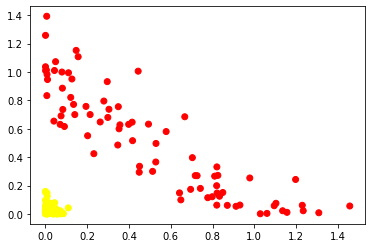

In [156]:
plt.scatter(ç[:,0], X_train_3[:,1], c=y_train_3, cmap='autumn')

In [162]:
p3 = Perceptron(max_iter=10, verbose=1, random_state=1)

In [163]:
p3.fit(X_train_3, y_train_3)

-- Epoch 1
Norm: 2.95, NNZs: 2, Bias: 1.000000, T: 160, Avg. loss: 0.012613
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.95, NNZs: 2, Bias: 1.000000, T: 320, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.95, NNZs: 2, Bias: 1.000000, T: 480, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 2.95, NNZs: 2, Bias: 1.000000, T: 640, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 2.95, NNZs: 2, Bias: 1.000000, T: 800, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 2.95, NNZs: 2, Bias: 1.000000, T: 960, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 2.95, NNZs: 2, Bias: 1.000000, T: 1120, Avg. loss: 0.000000
Total training time: 0.00 seconds.
Convergence after 7 epochs took 0.00 seconds


Perceptron(max_iter=10, random_state=1, verbose=1)

In [164]:
print(f"training accuracy: {p3.score(X_train_3, y_train_3) * 100}%")
print(f"test accuracy: {p3.score(X_test_3, y_test_3) * 100}%")

training accuracy: 100.0%
test accuracy: 100.0%


#### Now, the test accuracy is 100%!

## Cross-Validation

### The following procedure is followed for each of the $k$ “folds”:

- A model is trained using $k-1$ of the folds as training data;
- the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).

![Cross-Validation](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

## practice

### generate dataset which is even hard to be splitted

In [180]:
X, y = make_circles(
    n_samples=200,
    noise=0.3,
    factor=0.2,
    random_state=1
)
print(X.shape, y.shape)

(200, 2) (200,)


In [181]:
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train_4.shape, X_test_4.shape, y_train_4.shape, y_test_4.shape)

(160, 2) (40, 2) (160,) (40,)


### Visualize data

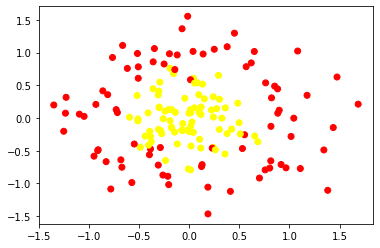

In [182]:
plt.scatter(X_train_4[:,0], X_train_4[:,1], c=y_train_4, cmap='autumn')

### tranform the input, $X \rightarrow X^2$ and $X \rightarrow X^3$

In [189]:
X_5 = X ** 2
X_6 = X ** 3

### Visualize data

In [190]:
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_5, y, test_size=0.2, random_state=1)
print(X_train_5.shape, X_test_5.shape, y_train_5.shape, y_test_5.shape)


X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(X_6, y, test_size=0.2, random_state=1)
print(X_train_6.shape, X_test_6.shape, y_train_6.shape, y_test_6.shape)

(160, 2) (40, 2) (160,) (40,)
(160, 2) (40, 2) (160,) (40,)


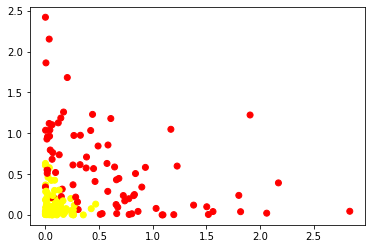

In [191]:
plt.scatter(X_train_5[:,0], X_train_5[:,1], c=y_train_5, cmap='autumn')

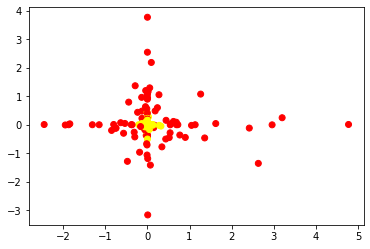

In [193]:
plt.scatter(X_train_6[:,0], X_train_6[:,1], c=y_train_6, cmap='autumn')

### define perceptron

In [210]:
p5 = Perceptron(max_iter=25, verbose=1, random_state=1)
p6 = Perceptron(max_iter=25, verbose=0, random_state=1) 

In [211]:
from sklearn.model_selection import cross_val_score
scores_5 = cross_val_score(p5, X_train_5, y_train_5, cv=5)

-- Epoch 1
Norm: 3.39, NNZs: 2, Bias: 1.000000, T: 128, Avg. loss: 0.076174
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 3.66, NNZs: 2, Bias: 2.000000, T: 256, Avg. loss: 0.044068
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 4.17, NNZs: 2, Bias: 1.000000, T: 384, Avg. loss: 0.058278
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 4.58, NNZs: 2, Bias: 1.000000, T: 512, Avg. loss: 0.056006
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 4.55, NNZs: 2, Bias: 2.000000, T: 640, Avg. loss: 0.048328
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 4.78, NNZs: 2, Bias: 2.000000, T: 768, Avg. loss: 0.056776
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 4.74, NNZs: 2, Bias: 3.000000, T: 896, Avg. loss: 0.059507
Total training time: 0.00 seconds.
Convergence after 7 epochs took 0.00 seconds
-- Epoch 1
Norm: 3.83, NNZs: 2, Bias: 1.000000, T: 128, Avg. loss: 0.083364
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 4.15, NNZs: 2, Bias: 2.000000, T: 256, Avg. loss: 

In [212]:
scores_6 = cross_val_score(p6, X_train_6, y_train_6, cv=5)

### The mean score and the 95% confidence interval of the score estimate are hence given by:

In [213]:
scores_5, scores_6

(array([0.6875 , 0.78125, 0.96875, 0.96875, 0.90625]),
 array([0.53125, 0.5    , 0.40625, 0.6875 , 0.4375 ]))

In [214]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_5.mean(), scores_5.std() * 2))

Accuracy: 0.86 (+/- 0.22)


In [215]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_6.mean(), scores_6.std() * 2))

Accuracy: 0.51 (+/- 0.20)


#### Conclusion: using cross-validation, we find the first transformation $x \rightarrow x^2$ is better.